In [ ]:
pip install ultralytics

In [52]:
import shutil
from ultralytics import YOLO
import cv2
import os
import matplotlib.pyplot as plt
from PIL import Image
import requests
import numpy as np

In [5]:
# Yolo mới nhất
model = YOLO()

100%|██████████| 5.35M/5.35M [00:00<00:00, 74.1MB/s]


# Set up

In [95]:
#base path
DIR_BASE = "/kaggle/input/8-classes-cloth-yolo"
OUTPUT_DIR = "/kaggle/working"
RESULT_DIR = "/kaggle/working/runs/detect/train2"
LABELS = [
    "shirt, blouse",
    "top, t-shirt, sweatshirt",
    "jacket",
    "pants",
    "skirt",
    "dress",
    "shoe",
    "bag, wallet"
]

In [79]:
# Initial yaml file for first round of training
text_file = f'''
train: {DIR_BASE}/train
val: {DIR_BASE}/val
cache_dir: {OUTPUT_DIR}

nc: 8
names: 
  - shirt, blouse
  - top, t-shirt, sweatshirt
  - jacket
  - pants
  - skirt
  - dress
  - shoe
  - bag, wallet
'''

with open(f'{OUTPUT_DIR}/data2.yaml', 'w') as f:
  f.write(text_file)

# Training

In [11]:
model.train(
    data="/kaggle/working/data.yaml",  # Đường dẫn đến file cấu hình data.yml
    epochs=50,           # Số epoch huấn luyện
    batch=32,            # Kích thước batch
    workers=12            # Số luồng xử lý dữ liệu
)

Ultralytics 8.3.54 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/kaggle/working/data.yaml, epochs=50, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=12, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxe

100%|██████████| 755k/755k [00:00<00:00, 17.9MB/s]


Overriding model.yaml nc=80 with nc=8

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /kaggle/input/8-classes-cloth-yolo/train/labels... 35290 images, 0 backgrounds, 0 corrupt: 100%|██████████| 35290/35290 [01:30<00:00, 390.78it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/8-classes-cloth-yolo/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.24 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/input/8-classes-cloth-yolo/val/labels... 4411 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4411/4411 [00:10<00:00, 413.85it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/8-classes-cloth-yolo/val is not writeable, cache not saved.
Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      4.73G      1.017      2.202      1.222        151        640: 100%|██████████| 1103/1103 [07:09<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:29<00:00,  2.38it/s]


                   all       4411      12066      0.519      0.585      0.551      0.421

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      4.72G     0.9778      1.471      1.166        152        640: 100%|██████████| 1103/1103 [06:54<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:25<00:00,  2.68it/s]


                   all       4411      12066       0.56      0.584      0.571      0.435

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      4.77G      1.044        1.4      1.201        143        640: 100%|██████████| 1103/1103 [06:52<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:26<00:00,  2.64it/s]


                   all       4411      12066      0.494      0.467      0.449        0.3

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      4.78G      1.074      1.352      1.224        158        640: 100%|██████████| 1103/1103 [06:48<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:25<00:00,  2.71it/s]


                   all       4411      12066       0.59      0.587      0.599       0.45

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      4.73G      1.012       1.23      1.189        110        640: 100%|██████████| 1103/1103 [06:49<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:25<00:00,  2.71it/s]


                   all       4411      12066      0.595      0.619       0.63      0.486

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      4.76G     0.9731      1.163      1.167        136        640: 100%|██████████| 1103/1103 [06:45<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:25<00:00,  2.72it/s]


                   all       4411      12066      0.625      0.614      0.641      0.502

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      4.75G     0.9444      1.117      1.151        151        640: 100%|██████████| 1103/1103 [06:45<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:25<00:00,  2.73it/s]


                   all       4411      12066      0.652      0.657      0.687      0.549

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      4.75G     0.9254       1.09      1.141        145        640: 100%|██████████| 1103/1103 [06:52<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:25<00:00,  2.66it/s]


                   all       4411      12066      0.682       0.66      0.708      0.572

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      4.72G       0.91      1.058      1.132        132        640: 100%|██████████| 1103/1103 [06:52<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:25<00:00,  2.76it/s]


                   all       4411      12066      0.668      0.682       0.71      0.582

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      4.71G     0.8969      1.037      1.124        170        640: 100%|██████████| 1103/1103 [06:47<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:25<00:00,  2.73it/s]

                   all       4411      12066      0.673      0.695      0.731      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      4.75G     0.8813      1.017      1.115        145        640: 100%|██████████| 1103/1103 [06:35<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:25<00:00,  2.75it/s]

                   all       4411      12066      0.683      0.708      0.738      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      4.72G     0.8718      1.002       1.11        123        640: 100%|██████████| 1103/1103 [06:41<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:24<00:00,  2.78it/s]

                   all       4411      12066      0.682      0.711      0.747       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      4.72G     0.8636     0.9853      1.105        156        640: 100%|██████████| 1103/1103 [06:49<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:25<00:00,  2.76it/s]

                   all       4411      12066      0.683      0.723       0.75      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      4.75G     0.8522     0.9715      1.098        120        640: 100%|██████████| 1103/1103 [06:43<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:24<00:00,  2.79it/s]

                   all       4411      12066      0.687       0.73      0.758      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      4.75G     0.8455     0.9608      1.094        146        640: 100%|██████████| 1103/1103 [06:47<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:25<00:00,  2.68it/s]

                   all       4411      12066      0.694      0.731      0.767      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      4.71G     0.8419     0.9542      1.092        135        640: 100%|██████████| 1103/1103 [06:40<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:24<00:00,  2.78it/s]

                   all       4411      12066      0.737      0.704      0.769      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      4.76G     0.8372     0.9455       1.09        125        640: 100%|██████████| 1103/1103 [06:37<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:24<00:00,  2.78it/s]

                   all       4411      12066      0.735      0.717      0.773      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      4.72G     0.8294     0.9336      1.084        137        640: 100%|██████████| 1103/1103 [06:32<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:24<00:00,  2.80it/s]

                   all       4411      12066      0.713      0.741      0.778      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      4.72G     0.8241      0.926      1.083        107        640: 100%|██████████| 1103/1103 [06:44<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:25<00:00,  2.74it/s]

                   all       4411      12066      0.716       0.74      0.781       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      4.72G     0.8181     0.9141      1.079        151        640: 100%|██████████| 1103/1103 [06:44<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:25<00:00,  2.76it/s]

                   all       4411      12066      0.717       0.74      0.784      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      4.72G     0.8164     0.9126      1.078        128        640: 100%|██████████| 1103/1103 [06:39<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:24<00:00,  2.77it/s]

                   all       4411      12066      0.733      0.733      0.787      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      4.71G     0.8101     0.9007      1.074        148        640: 100%|██████████| 1103/1103 [06:40<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:24<00:00,  2.77it/s]

                   all       4411      12066      0.739      0.727      0.789       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      4.76G     0.8055     0.8961      1.073        131        640: 100%|██████████| 1103/1103 [06:41<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:24<00:00,  2.79it/s]

                   all       4411      12066      0.732      0.738       0.79      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      4.71G     0.7975     0.8816      1.068        141        640: 100%|██████████| 1103/1103 [06:42<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:24<00:00,  2.77it/s]

                   all       4411      12066      0.739      0.733      0.792      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      4.71G     0.7933     0.8803      1.065        141        640: 100%|██████████| 1103/1103 [06:35<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:24<00:00,  2.83it/s]

                   all       4411      12066      0.749       0.73      0.792      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      4.75G     0.7913     0.8678      1.063        146        640: 100%|██████████| 1103/1103 [06:33<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:25<00:00,  2.66it/s]

                   all       4411      12066      0.744      0.735      0.793      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      4.75G     0.7841     0.8618      1.059        134        640: 100%|██████████| 1103/1103 [06:39<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:24<00:00,  2.82it/s]

                   all       4411      12066      0.744      0.738      0.796      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      4.75G     0.7773     0.8522      1.057        142        640: 100%|██████████| 1103/1103 [06:42<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:24<00:00,  2.84it/s]

                   all       4411      12066      0.744      0.739      0.798      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      4.75G     0.7739     0.8502      1.055        128        640: 100%|██████████| 1103/1103 [06:37<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:24<00:00,  2.80it/s]

                   all       4411      12066       0.74      0.747      0.799      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50       4.7G     0.7727     0.8442      1.054        135        640: 100%|██████████| 1103/1103 [06:35<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:24<00:00,  2.81it/s]

                   all       4411      12066      0.743      0.745        0.8      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      4.75G     0.7652     0.8295      1.051        138        640: 100%|██████████| 1103/1103 [06:39<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:25<00:00,  2.76it/s]

                   all       4411      12066      0.746      0.743      0.801      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      4.71G     0.7632     0.8296       1.05        147        640: 100%|██████████| 1103/1103 [06:36<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:24<00:00,  2.80it/s]

                   all       4411      12066      0.746      0.745      0.801      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      4.68G     0.7584     0.8215      1.046        133        640: 100%|██████████| 1103/1103 [06:45<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:24<00:00,  2.79it/s]

                   all       4411      12066      0.746      0.745      0.802      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      4.75G      0.754     0.8163      1.045        129        640: 100%|██████████| 1103/1103 [06:47<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:25<00:00,  2.74it/s]

                   all       4411      12066      0.753      0.744      0.803       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      4.74G     0.7493     0.8043      1.042        137        640: 100%|██████████| 1103/1103 [06:42<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:25<00:00,  2.73it/s]

                   all       4411      12066      0.751      0.746      0.804      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      4.76G     0.7468      0.799      1.041        123        640: 100%|██████████| 1103/1103 [06:41<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:25<00:00,  2.73it/s]

                   all       4411      12066      0.752      0.746      0.805      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      4.71G     0.7416     0.7927      1.037        113        640: 100%|██████████| 1103/1103 [06:49<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:25<00:00,  2.76it/s]

                   all       4411      12066      0.745      0.752      0.806      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      4.68G     0.7376     0.7903      1.036        165        640: 100%|██████████| 1103/1103 [06:42<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:24<00:00,  2.78it/s]

                   all       4411      12066      0.748      0.748      0.807      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      4.75G     0.7331     0.7803      1.033        157        640: 100%|██████████| 1103/1103 [06:36<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:24<00:00,  2.81it/s]

                   all       4411      12066      0.746      0.751      0.808      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      4.72G     0.7294     0.7755      1.031        159        640: 100%|██████████| 1103/1103 [06:49<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:25<00:00,  2.75it/s]

                   all       4411      12066       0.75       0.75      0.808      0.696


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      4.69G     0.6739     0.6707     0.9982         71        640: 100%|██████████| 1103/1103 [06:35<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:24<00:00,  2.77it/s]

                   all       4411      12066      0.749      0.751      0.809      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      4.68G     0.6662      0.656      0.994         82        640: 100%|██████████| 1103/1103 [06:27<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:24<00:00,  2.83it/s]

                   all       4411      12066       0.75       0.75       0.81      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      4.69G     0.6579     0.6454     0.9886         66        640: 100%|██████████| 1103/1103 [06:26<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:25<00:00,  2.76it/s]

                   all       4411      12066       0.75      0.751      0.811      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      4.69G     0.6485      0.631     0.9845         67        640: 100%|██████████| 1103/1103 [06:25<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:24<00:00,  2.79it/s]

                   all       4411      12066      0.753       0.75      0.811      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      4.68G      0.641     0.6181     0.9807         61        640: 100%|██████████| 1103/1103 [06:30<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:25<00:00,  2.76it/s]

                   all       4411      12066      0.761      0.744      0.812      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      4.68G     0.6337     0.6075     0.9754         59        640: 100%|██████████| 1103/1103 [06:33<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:24<00:00,  2.77it/s]

                   all       4411      12066      0.762      0.744      0.813      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      4.68G     0.6312     0.5967     0.9746         63        640: 100%|██████████| 1103/1103 [06:31<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:24<00:00,  2.84it/s]

                   all       4411      12066      0.767      0.741      0.814      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      4.68G     0.6224     0.5866     0.9677         66        640: 100%|██████████| 1103/1103 [06:25<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:25<00:00,  2.71it/s]

                   all       4411      12066       0.77      0.741      0.814      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      4.68G     0.6169     0.5767     0.9653         87        640: 100%|██████████| 1103/1103 [06:21<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:25<00:00,  2.76it/s]

                   all       4411      12066      0.771      0.742      0.815      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      4.68G     0.6117      0.569      0.964         68        640: 100%|██████████| 1103/1103 [06:20<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:25<00:00,  2.75it/s]

                   all       4411      12066      0.771      0.742      0.815      0.705



50 epochs completed in 5.928 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 5.5MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.54 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 238 layers, 2,583,712 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:28<00:00,  2.43it/s]


                   all       4411      12066      0.771      0.743      0.816      0.704
         shirt, blouse        620        625      0.693      0.477      0.629      0.521
top, t-shirt, sweatshirt       1624       1663      0.794      0.718      0.807      0.695
                jacket        804        814      0.757      0.811      0.856      0.785
                 pants       1219       1227      0.805      0.904      0.937       0.87
                 skirt        483        486      0.685      0.698      0.772      0.702
                 dress       1844       1852      0.845      0.899      0.944      0.884
                  shoe       2426       4678      0.893      0.859      0.926      0.711
           bag, wallet        693        721      0.698      0.576      0.653      0.466
Speed: 0.1ms preprocess, 1.7ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d0db96a2770>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,

In [12]:
# Xuất mô hình dưới dạng .pt
model.export(format='onnx')

Ultralytics 8.3.54 🚀 Python-3.10.12 torch-2.4.1+cu121 CPU (Intel Xeon 2.00GHz)
YOLO11n summary (fused): 238 layers, 2,583,712 parameters, 0 gradients, 6.3 GFLOPs

PyTorch: starting from 'runs/detect/train2/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 12, 8400) (5.2 MB)
requirements: Ultralytics requirements ['onnxslim', 'onnxruntime-gpu'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.6/142.6 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 291.5/291.5 MB 254.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 162.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 285.6 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 11.8s, installed 2 packages: ['onnxslim', 'onnxruntime-gpu']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.45...


'runs/detect/train2/weights/best.onnx'

# Evaluate

- P: 0.772
- R: 0.742
- mAP50: 0.816
- mAP50-95: 0.705

In [13]:
model.val()

Ultralytics 8.3.54 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 238 layers, 2,583,712 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning /kaggle/input/8-classes-cloth-yolo/val/labels... 4411 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4411/4411 [00:04<00:00, 906.38it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/8-classes-cloth-yolo/val is not writeable, cache not saved.


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 138/138 [00:31<00:00,  4.32it/s]


                   all       4411      12066      0.772      0.742      0.816      0.705
         shirt, blouse        620        625      0.695      0.474      0.629      0.521
top, t-shirt, sweatshirt       1624       1663       0.79      0.716      0.808      0.696
                jacket        804        814      0.757       0.81      0.856      0.786
                 pants       1219       1227      0.807      0.904      0.937       0.87
                 skirt        483        486      0.688        0.7      0.774      0.705
                 dress       1844       1852      0.845      0.899      0.944      0.884
                  shoe       2426       4678      0.893      0.858      0.926      0.713
           bag, wallet        693        721        0.7      0.577      0.654      0.466
Speed: 0.2ms preprocess, 2.6ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train22


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d0db86eac20>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,

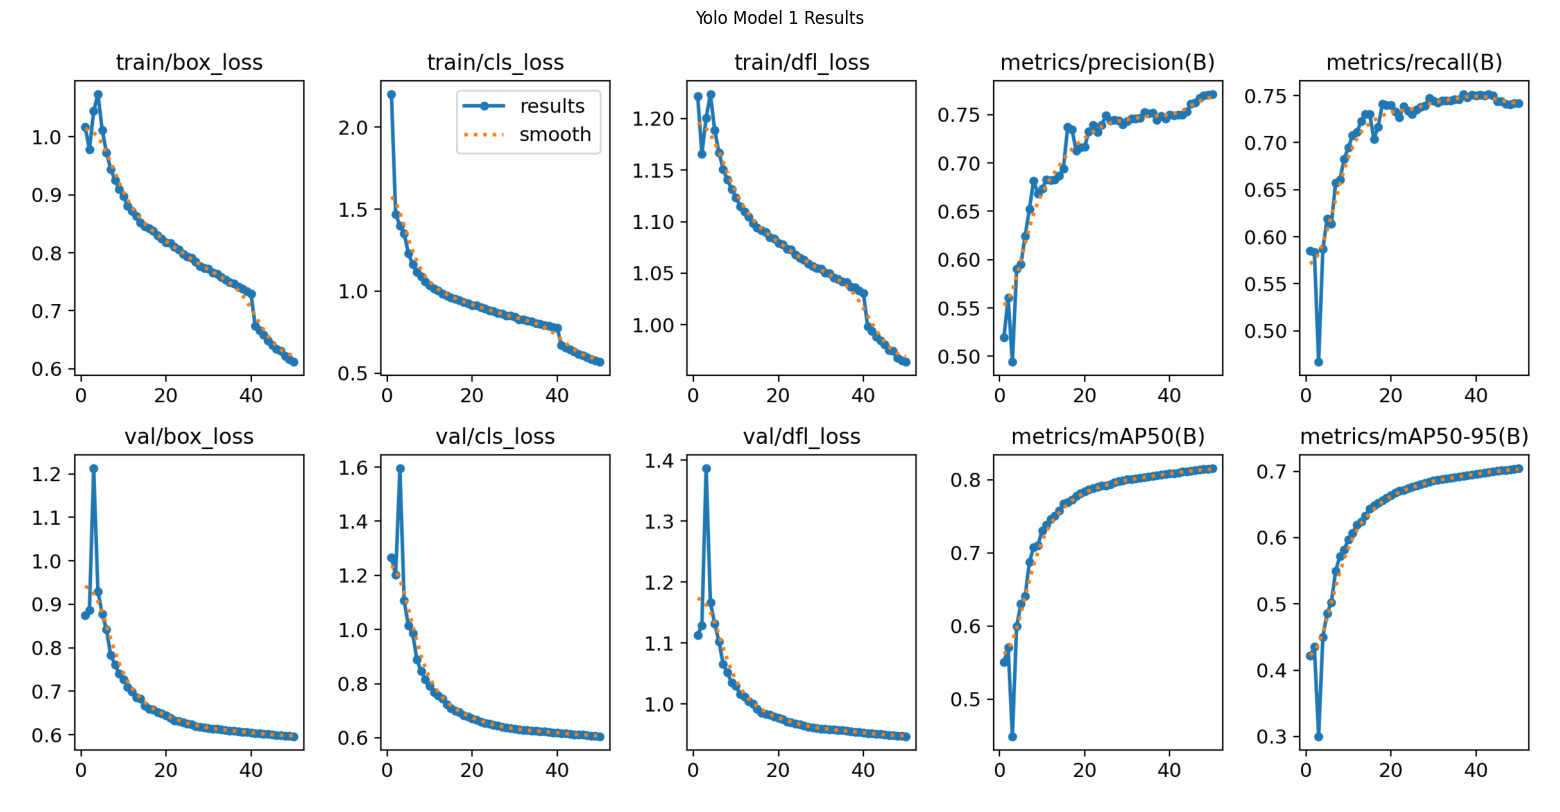

In [82]:
# Load image
yolo1_results = cv2.imread(f'{RESULT_DIR}/results.png', 1)

# Convert BGR to RGB
yolo1_results_rgb = cv2.cvtColor(yolo1_results, cv2.COLOR_BGR2RGB)

# Set a larger figure size for display
plt.figure(figsize=(20, 10))

# Display the image
plt.title("Yolo Model 1 Results")
plt.imshow(yolo1_results_rgb)
plt.axis("off")
plt.show()

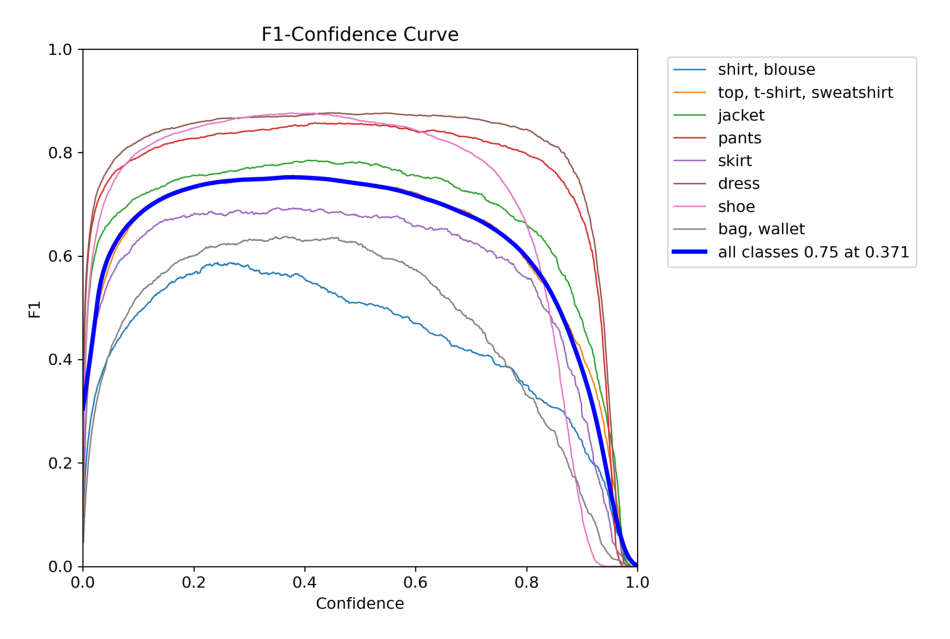

In [83]:
# Load image
yolo1_f1 = cv2.imread(f'{RESULT_DIR}/F1_curve.png', 1)

# Convert BGR to RGB
yolo1_f1_rgb = cv2.cvtColor(yolo1_f1, cv2.COLOR_BGR2RGB)

# Set a larger figure size for display
plt.figure(figsize=(12, 10))

# Display the image
plt.imshow(yolo1_f1_rgb)
plt.axis("off")
plt.show()

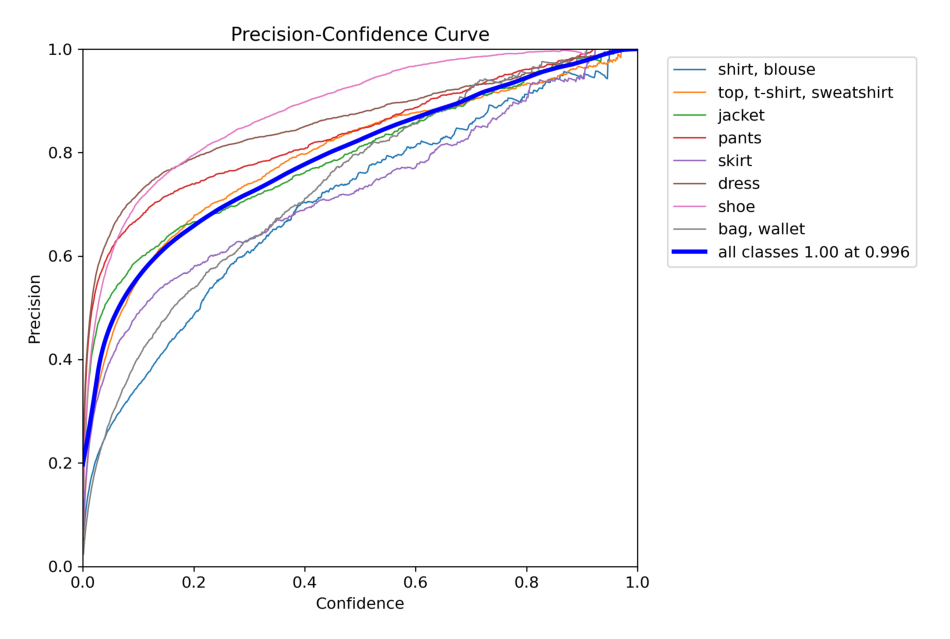

In [84]:
# Load image
yolo1_pc = cv2.imread(f'{RESULT_DIR}/P_curve.png', 1)

# Convert BGR to RGB
yolo1_pc_rgb = cv2.cvtColor(yolo1_pc, cv2.COLOR_BGR2RGB)

# Set a larger figure size for display
plt.figure(figsize=(12, 10))

# Display the image
plt.imshow(yolo1_pc_rgb)
plt.axis("off")
plt.show()

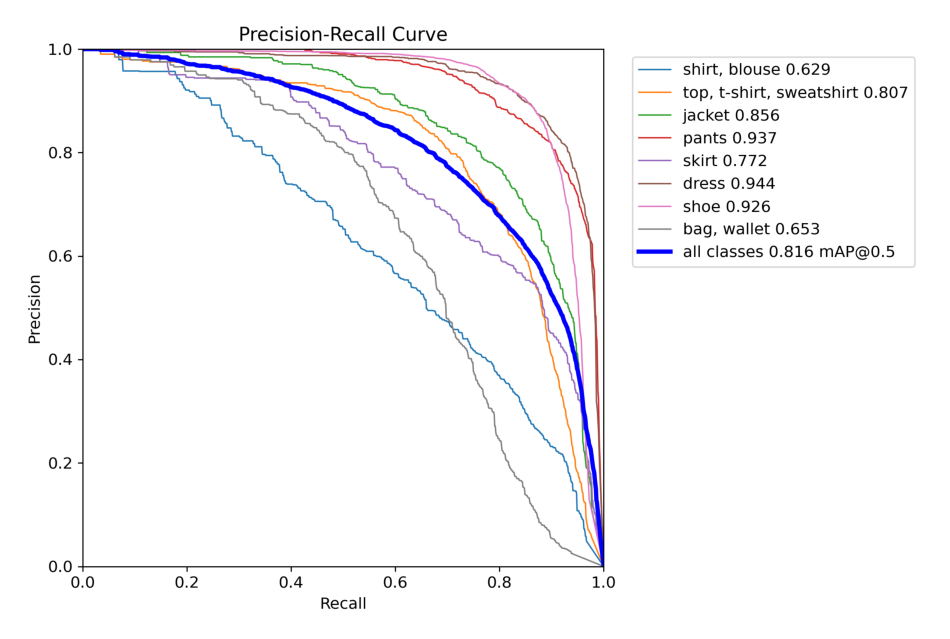

In [85]:
# Load image
yolo1_pr = cv2.imread(f'{RESULT_DIR}/PR_curve.png', 1)

# Convert BGR to RGB
yolo1_pr_rgb = cv2.cvtColor(yolo1_pr, cv2.COLOR_BGR2RGB)

# Set a larger figure size for display
plt.figure(figsize=(12, 10))

# Display the image
plt.imshow(yolo1_pr_rgb)
plt.axis("off")
plt.show()

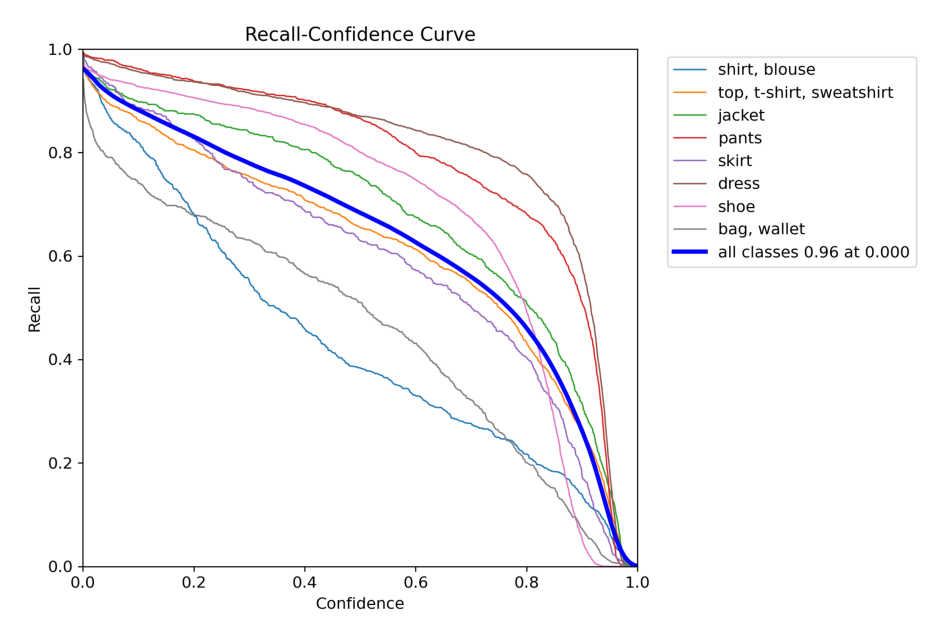

In [86]:
# Load image
yolo1_rm = cv2.imread(f'{RESULT_DIR}/R_curve.png', 1)

# Convert BGR to RGB
yolo1_rm_rgb = cv2.cvtColor(yolo1_rm, cv2.COLOR_BGR2RGB)

# Set a larger figure size for display
plt.figure(figsize=(12, 10))

# Display the image
plt.imshow(yolo1_rm_rgb)
plt.axis("off")
plt.show()

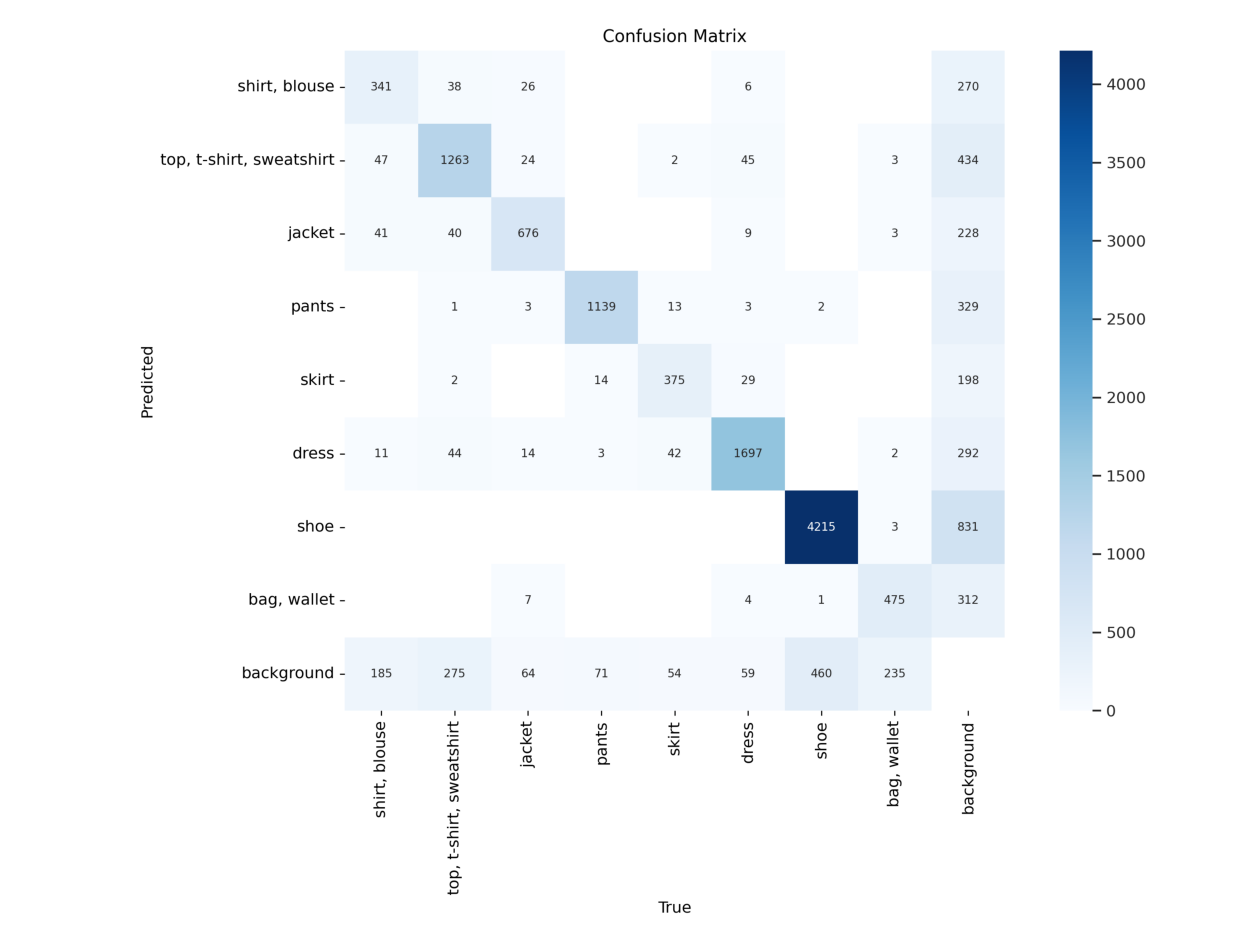

In [87]:
# Load image
yolo1_cm = cv2.imread(f'{RESULT_DIR}/confusion_matrix.png', 1)

# Convert BGR to RGB
yolo1_cm_rgb = cv2.cvtColor(yolo1_cm, cv2.COLOR_BGR2RGB)

# Set a larger figure size for display
plt.figure(figsize=(20, 12))

# Display the image
plt.imshow(yolo1_cm_rgb)
plt.axis("off")
plt.show()

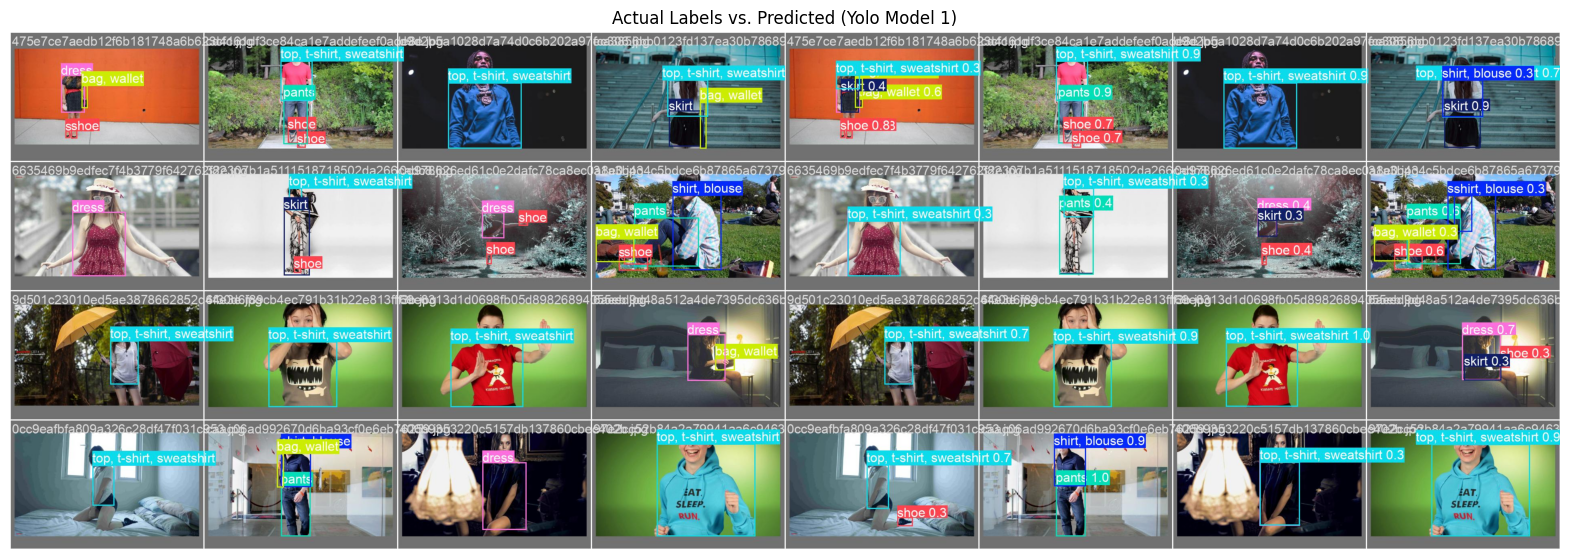

In [88]:
# Load the image
yolo1_pred = cv2.imread(f'{RESULT_DIR}/val_batch0_pred.jpg', -1)

# Convert BGR to RGB
yolo1_pred_rgb = cv2.cvtColor(yolo1_pred, cv2.COLOR_BGR2RGB)

actual_labels = cv2.imread(f'{RESULT_DIR}/val_batch0_labels.jpg', -1)
actual_labels_rgb = cv2.cvtColor(actual_labels, cv2.COLOR_BGR2RGB)

# Combine the images side by side
combined_image = cv2.hconcat([actual_labels_rgb, yolo1_pred_rgb])
plt.figure(figsize=(20, 12))

# Display the combined image
plt.imshow(combined_image)
plt.axis("off")
plt.title("Actual Labels vs. Predicted (Yolo Model 1)")
plt.show()

# Test with new image

In [90]:
def predict_image(img, model):
    """
    Perform prediction on the provided image using the YOLO model.

    Args:
        img (numpy.ndarray): Image to predict on.
        model: YOLO model.

    Returns:
        boxes: Detected bounding boxes.
    """
    # Convert image to PIL format for model input
    img_pil = Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    results = model(img_pil)
    return results[0].boxes  # Return bounding boxes

In [91]:
def load_image_from_url(url_or_path):
    """
    Load an image from a URL or local path.

    Args:
        url_or_path (str): Image URL or local file path.

    Returns:
        img (numpy.ndarray): Loaded image.
    """
    if os.path.isfile(url_or_path):  # Check if it's a local file
        return cv2.imread(url_or_path, cv2.IMREAD_COLOR)
    else:  # Assume it's a URL
        response = requests.get(url_or_path, stream=True)
        if response.status_code == 200:
            img_array = np.asarray(bytearray(response.content), dtype=np.uint8)
            return cv2.imdecode(img_array, cv2.IMREAD_COLOR)
        else:
            raise ValueError(f"Failed to fetch image from {url_or_path}")

In [92]:
def display_image_with_boxes(image, boxes, class_names):
    """
    Display an image with bounding boxes.

    Args:
        image: Image (NumPy array or PyTorch tensor).
        boxes: List of bounding boxes.
        class_names: List of class names.

    Returns:
        None
    """
    # Display the image
    fig, ax = plt.subplots(1, figsize=(12, 8))
    ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Draw bounding boxes
    for box in boxes:
        x1, y1, x2, y2 = box.xyxy[0].cpu().numpy()
        conf = box.conf[0].cpu().numpy()
        class_id = int(box.cls[0].cpu().numpy())
        label = class_names[class_id] if class_id < len(class_names) else "Unknown"

        # Draw the bounding box
        rect = patches.Rectangle(
            (x1, y1), x2 - x1, y2 - y1, linewidth=2, edgecolor="red", facecolor="none"
        )
        ax.add_patch(rect)
        ax.text(
            x1, y1 - 5, f"{label}: {conf:.2f}",
            color="red", fontsize=10,
            bbox=dict(facecolor="yellow", alpha=0.5)
        )

    plt.axis("off")
    plt.show()

In [93]:
# Danh sách URL
urls = [
"https://i5.walmartimages.com/seo/George-Men-s-Premium-Straight-Fit-Khaki-Pants_f659d317-de24-4b92-bf8d-05e1223a2bf7.c2637e94c3c2c3e9e36485c039e3d0e2.jpeg",
"https://britishretro.co.uk/wp-content/uploads/2023/08/006-red-tartan-50s-full-circle-skirt.jpg",
"https://factorie.com.au/on/demandware.static/-/Sites-catalog-master-factorie/default/dwc47daf5b/5297749/5297749-02-2.jpg",
"https://vulcano.sgp1.digitaloceanspaces.com/media/17830/ao-jacket-3003b-vulcano01.webp",
"https://images.pexels.com/photos/29859973/pexels-photo-29859973/free-photo-of-two-men-shopping-in-urban-mall-setting.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=2",
]

In [96]:
# Load model đã huấn luyện
model = YOLO(f'{RESULT_DIR}/weights/best.pt')  # Đường dẫn đến mô hình được lưu sau khi huấn luyện (best.pt là file mặc định)


0: 640x480 1 top, t-shirt, sweatshirt, 1 pants, 2 shoes, 16.8ms
Speed: 3.2ms preprocess, 16.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


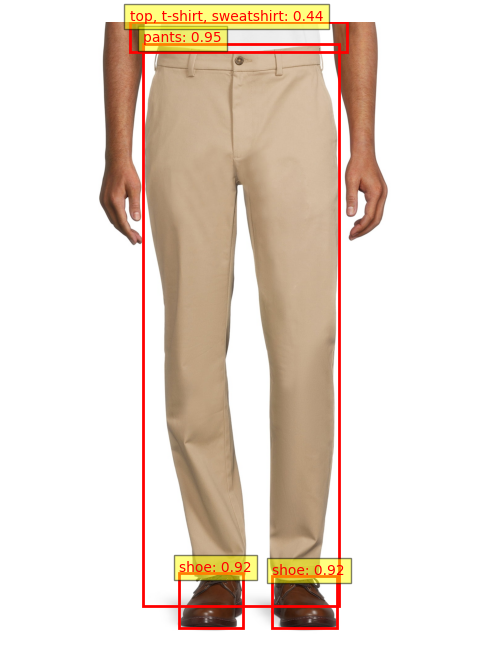


0: 640x480 1 top, t-shirt, sweatshirt, 1 skirt, 2 shoes, 9.3ms
Speed: 2.6ms preprocess, 9.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


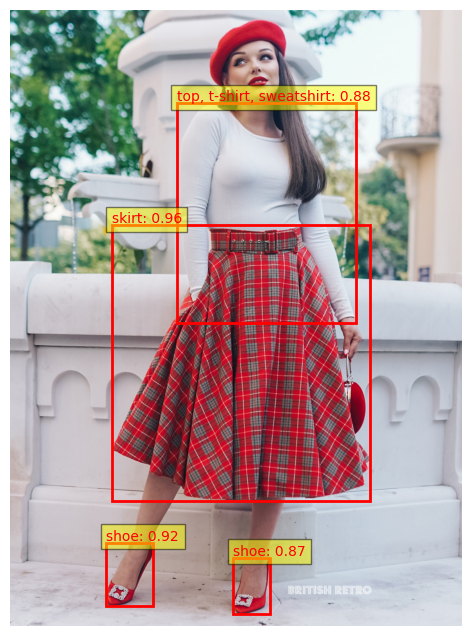


0: 640x448 3 top, t-shirt, sweatshirts, 1 jacket, 1 pants, 10.2ms
Speed: 2.5ms preprocess, 10.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


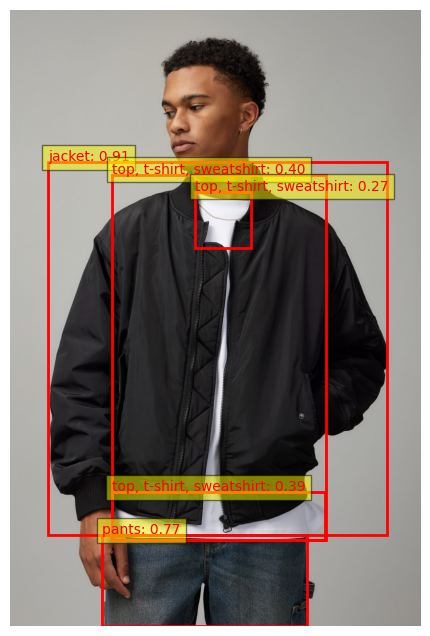


0: 640x512 1 top, t-shirt, sweatshirt, 1 jacket, 1 pants, 11.5ms
Speed: 3.3ms preprocess, 11.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 512)


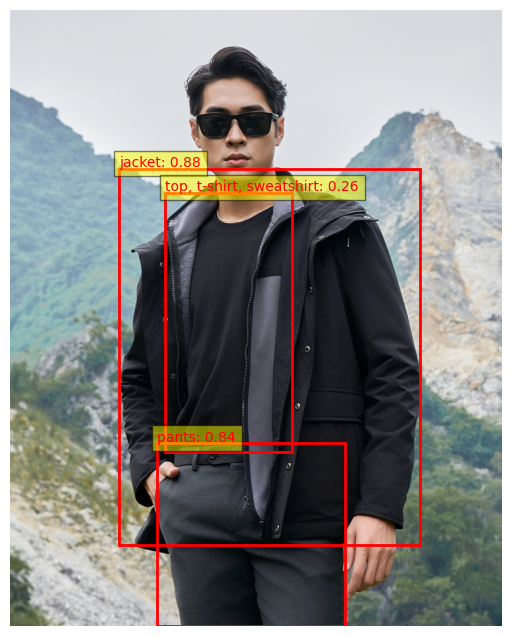


0: 640x448 1 top, t-shirt, sweatshirt, 1 jacket, 2 pantss, 3 shoes, 3 bag, wallets, 9.7ms
Speed: 2.3ms preprocess, 9.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


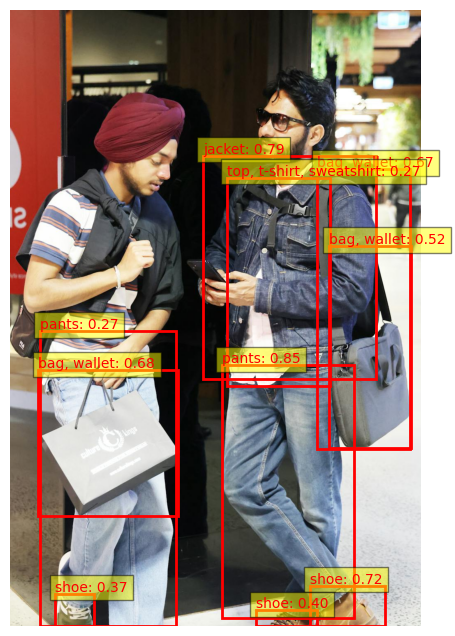

In [97]:
for url in urls:
    try:
        img = load_image_from_url(url)
        boxes = predict_image(img, model)
        display_image_with_boxes(img, boxes, LABELS)
    except Exception as e:
        print(f"Error processing {url}: {e}")